## Манипулирование данными
Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными — получить их и обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

In [8]:
import torch

Tensor — это массив (возможно, многомерный) числовых значений. Tensor с одной осью называется (в математике) вектором, с двумя — матрицей. Для массивов с более чем двумя осями нет специальных имен, их называют просто тензорами. Самый простой объект, который мы можем создать, — это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [9]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
xx = torch.Tensor([[x, x**2, x**3] for x in range(12)])
xx

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 1.0000e+00, 1.0000e+00],
        [2.0000e+00, 4.0000e+00, 8.0000e+00],
        [3.0000e+00, 9.0000e+00, 2.7000e+01],
        [4.0000e+00, 1.6000e+01, 6.4000e+01],
        [5.0000e+00, 2.5000e+01, 1.2500e+02],
        [6.0000e+00, 3.6000e+01, 2.1600e+02],
        [7.0000e+00, 4.9000e+01, 3.4300e+02],
        [8.0000e+00, 6.4000e+01, 5.1200e+02],
        [9.0000e+00, 8.1000e+01, 7.2900e+02],
        [1.0000e+01, 1.0000e+02, 1.0000e+03],
        [1.1000e+01, 1.2100e+02, 1.3310e+03]])

In [11]:
torch.Tensor([1])

tensor([1.])

In [12]:
x.shape, xx.shape

(torch.Size([12]), torch.Size([12, 3]))

In [13]:
x.device

device(type='cpu')

In [14]:
x.view((2,-1,2)).shape

torch.Size([2, 3, 2])

In [15]:
x.view((2,-1,2))

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])

In [16]:
x.reshape((2,-1,3)).shape

torch.Size([2, 2, 3])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [17]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [18]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [19]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно, указав все значения

In [20]:
torch.tensor([[1,2,3], [4,5,6], [10,11,0]])

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [10, 11,  0]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использует равномерное распределение, второе - нормальное

In [21]:
torch.rand((2,3,4))

tensor([[[0.8719, 0.3096, 0.5240, 0.6423],
         [0.7055, 0.8282, 0.4916, 0.2742],
         [0.4722, 0.6270, 0.4304, 0.0053]],

        [[0.6268, 0.3171, 0.7559, 0.5735],
         [0.2630, 0.6455, 0.0756, 0.4483],
         [0.3814, 0.3107, 0.1432, 0.1135]]])

In [22]:
torch.randn((2,3,4))

tensor([[[ 0.6655, -0.1914, -0.3420, -0.4509],
         [ 0.4067,  0.8399, -0.8106,  2.9458],
         [ 0.1429,  0.2357, -0.6945,  1.3108]],

        [[ 1.0921,  1.3956,  0.4025,  2.1911],
         [-0.4068, -0.2558,  1.2837,  0.5560],
         [ 0.1047,  0.3415, -0.1270,  0.3390]]])

## Операции
Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов.

In [23]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [24]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.



In [25]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [26]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [27]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

In [28]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [29]:
x.sum()

tensor(66)

In [30]:
x.sum().item()

66

## Broadcast
Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast. Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [31]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [32]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [33]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [34]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [35]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

In [36]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [37]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [38]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примените оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точках (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимися вершинами/
   

1. ----------

In [39]:
A = torch.tensor([[1.0,1.0],[1.0,2.0]])

In [40]:
I = torch.tensor([[1.0,0],[0,1.0]])

In [41]:
B = torch.tensor(((2,-1.), (-1,1.)))
torch.mm(A, B)

tensor([[1., 0.],
        [0., 1.]])

In [42]:
while True:
  B =(torch.randint(20, (2, 2))-10).to(torch.float)
  p=  torch.mm(A,B)
  if torch.equal(torch.mm(A,B),I):
    break
    

In [43]:
B

tensor([[ 2., -1.],
        [-1.,  1.]])

2. ----------

In [44]:
vertices = [(1,1), (1,-1), (-1, -1), (-1, 1)]
A = torch.tensor(((1,2), (3,4)) )
#A = torch.tensor([[1,1],[1,2]])

In [45]:
vert = []
for ver in vertices:
  ver = torch.tensor(ver)
  print('Vertiz',ver, 'Da resultado',torch.mv(A,ver))
  vert.append(torch.mv(A,ver))

Vertiz tensor([1, 1]) Da resultado tensor([3, 7])
Vertiz tensor([ 1, -1]) Da resultado tensor([-1, -1])
Vertiz tensor([-1, -1]) Da resultado tensor([-3, -7])
Vertiz tensor([-1,  1]) Da resultado tensor([1, 1])


In [46]:
for i in range(len(vert)-1):
  for j in range(i+1,len(vert)):
    print((vert[i] - vert[j]).pow(2).sum().sqrt().item())
    
    

8.9442720413208
15.231546401977539
6.324555397033691
6.324555397033691
2.8284270763397217
8.9442720413208


## Детектор спама

На  основе формула Байеса будет дать вероятность что данный сообшение является спам

$P(spam|w)=\frac{P(w|spam)P(spam)}{P(w)}$

$P(spam|w)=\frac{P(w_1|spam)P(w_2|spam)...P(w_n|spam)P(spam)}{P(w_1)P(w_2)...P(w_n)}$

In [47]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2023-05-27 10:42:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip.1’

smsspamcollection.z 100%[===================>] 198.65K   242KB/s    in 0.8s    

2023-05-27 10:42:40 (242 KB/s) - ‘smsspamcollection.zip.1’ saved [203415/203415]



In [48]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
replace SMSSpamCollection? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [1]:
import pandas as pd

In [2]:
df = pd.read_table('SMSSpamCollection', sep='\t', header=None,names=['label', 'sms_message'])

df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df['label'] = df.label.map({'ham':0,'spam':1})

df.shape

(5572, 2)

In [4]:
df['label']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5572, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 5572
Number of rows in the training set: 4179
Number of rows in the test set: 1393


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import torch

In [11]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train).toarray()
testing_data = count_vector.transform(X_test).toarray()

In [12]:
training_tensor = torch.Tensor(training_data)
testing_tensor = torch.Tensor(testing_data)

In [13]:
training_tensor.shape

torch.Size([4179, 7456])

$P(w) = \frac{Количество\ вхождений\ слова\ w\ в\ датасет}{Количество\ слов\ в\ датасете"}$

In [25]:
p_w = training_tensor.sum(axis=0)/training_tensor.sum()

In [26]:
p_w.shape


torch.Size([7456])

In [27]:
spam_training_tensor = training_tensor[(y_train == 1).values]
p_w_spam = spam_training_tensor.sum(axis=0)/spam_training_tensor.sum()

$P(spam) = \frac{Количество\ смап}{Количество \ сооб."}$

In [28]:
p_spam = (y_train==1).values.sum()/len(y_train)
p_not_spam = (y_train == 0).values.sum() / len(y_train)

In [29]:
def pred(p_spam,p_w,p_w_spam,p_not_spam,y_pred):
  return ((p_w_spam*y_pred)[y_pred>0].prod()*p_spam)/(y_pred*p_w)[y_pred!=0].prod()

In [30]:
y_pred = []
for i in testing_tensor:
  y_pred.append(pred(p_spam,p_w,p_w_spam,p_not_spam,i).item())

In [31]:
y_pred

[0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.012653900310397148,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.05273375287652016,
 nan,
 nan,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 1.4783867597579956,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.052761901170015335,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 nan,
 nan,
 nan,
 0.07841785997152328,
 0.0,
 0.0,
 nan,
 nan,
 0.0,
 0.0,
 0.0005945823504589498,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 0.0,
 0.0,
 0.000664493243675679,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 0.019028540700674057,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 nan,
 0.0,
 0.0,
 2.578943531261757e-05,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 0.028392724692821503,
 0.0,
 0.0,
 0.0002654030395206064,
 0.0,
 nan

In [112]:
a = []
for i in y_pred:
  if i >0:
    a.append(1)
  else:
    a.append(0)

In [113]:
(y_test==a).values.sum()/len(y_test)

0.8040201005025126

In [114]:
(y_test==1).values.sum()

185

In [120]:
p=0
for i,j in zip(a,y_test):
  if i == j & j ==1:
    p+=1
  

In [121]:
p

24

In [109]:
len(y_pred)

1393

In [101]:
y_pred = testing_tensor[4]
((p_w_span*y_pred)[y_pred>0].prod()*p_spam)/(y_pred*p_w)[y_pred!=0].prod()


tensor(nan)

In [102]:
[y_pred>0]

[tensor([False, False, False,  ..., False, False, False])]

## Постройте график плотности для нормального распределения

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
tensor = torch.randn(1000)

(array([ 1.,  8., 16., 21., 27., 15.,  9.,  2.,  0.,  1.]),
 array([-2.38464522, -1.78120232, -1.17775929, -0.57431638,  0.0291266 ,
         0.63256955,  1.23601246,  1.83945549,  2.44289851,  3.04634142,
         3.64978433]),
 <BarContainer object of 10 artists>)

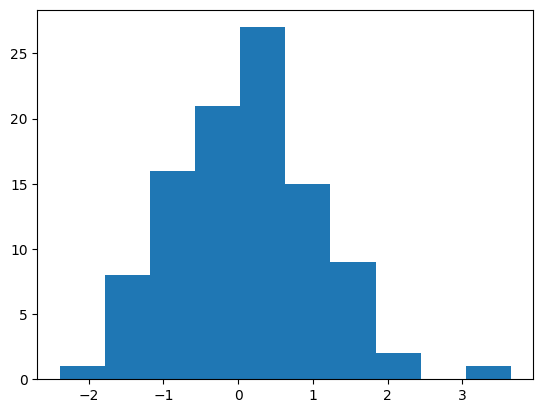

In [3]:
plt.hist(torch.randn(100))